# Data cleaning

As we have seen, outliers can distort the values of statistics such as the mean and standard deviation

In real datasets, outliers are common, arising from one of the following:

<ul>
    <li> Real but unusual values (eg many basketball players are outliers in terms of height)
    <li> Noise in a data recording system (eg in brain imaging data, noise signals from head movement are much larger than the real brain activity we are trying to record)
    <li> Data entry error (human types the wrong number)
</ul>

Identifying and removing outliers and bad data points is a crucial step in the process of preparing our data for analysis, sometimes called <i>data wrangling</i>


### Set up Python libraries

As usual, run the code cell below to import the relevant Python libraries

In [1]:
# Set-up Python libraries - you need to run this but you don't need to change it
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas 
import seaborn as sns
sns.set_theme()

## Removing an outlier

In some cases, we can identify that an outlier datapoint should not be in our dataset, and remove it.

Let's try an example:

### Import the data

Let's import a dataframe with size information on a random sample of cars



In [2]:
cars = pandas.read_csv('data/cars_outlier1.csv')
display(cars)

,length,height,width,type
0,3.9187,1.5320,1.8030,car
1,4.6486,1.5936,1.6463,car
2,3.5785,1.5447,1.7140,car
3,3.5563,1.5549,1.7331,car
4,4.0321,1.5069,1.7320,car
...,...,...,...,...
976,5.0897,1.8396,1.8356,car
977,4.0224,1.5860,1.7862,car
978,3.4771,1.5340,1.7418,car
979,5.2096,1.6396,1.8229,car


### Get descriptives

We can get the descriptive statistics using the <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html"><tt>decribe()</tt></a> method in <tt>pandas</tt>

In [3]:
cars.describe()

,length,height,width
count,981.000000,981.000000,981.000000
mean,4.197994,1.580810,1.791925
std,0.517761,0.059263,0.046921
min,3.110900,1.430400,1.624100
25%,3.815400,1.540000,1.760200
50%,4.121600,1.574500,1.790400
75%,4.518400,1.611900,1.820900
max,6.102400,1.899300,1.958000


Hm, the maximum value for car length looks very high.

Let's plot the data (don't worry about the plotting code, there is a session on this later)

<AxesSubplot:xlabel='length', ylabel='Count'>

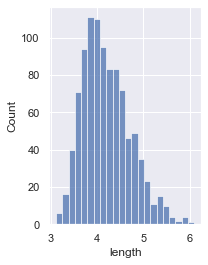

In [4]:
plt.subplot(1,2,1)
sns.histplot(cars['length'])

There must be a cars of length up to 15.36m (the max length in the descriptives table) but we can't see them in the plot - although we can see the x axis is stretched out to accommodate them.

Let's zoom in a bit:

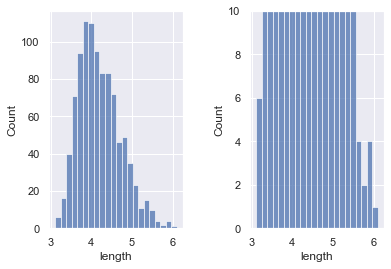

In [5]:
plt.subplot(1,2,1)
sns.histplot(cars['length'])

plt.subplot(1,2,2)
sns.histplot(cars['length'])
plt.ylim((0,10))

plt.subplots_adjust(wspace = 0.5)

Hm, a couple of outliers.

Let's check it in the dataframe by pulling out any cars longer than 8m:

In [6]:
cars[cars['length']>8]

,length,height,width,type


ahh, the value of <tt>type</tt> for the two vehicles that exceed 8m is 'truck'. 

Let's check what other types we have:

In [7]:
cars['type'].value_counts()

car    981
Name: type, dtype: int64

Hm, 981 cars and 2 trucks. I think the trucks were included by mistake. Let's drop them:

In [8]:
cars_clean = cars.drop([100,101]) # 100 is the row index of the truck - you can see it above
cars_clean['type'].value_counts() # check if we still have any trucks in the sample

car    979
Name: type, dtype: int64

We got the row indices for the trucks from the cell above where we pulled out rows with length >8m and inspected it. 

if you were working with lots of files, it could be useful to cut out the middle man and find the row index using code:

In [9]:
ix = cars.index[cars['type']=='truck'] # find the row index for the truck and save it as 'ix'
cars_clean = cars.drop(ix)
cars_clean['type'].value_counts() # check if we still have any trucks in the sample

car    981
Name: type, dtype: int64

## NaN an outlier value

Sometimes, we don't want to remove an entire entry.

Say for example there is a data entry error for one of the vehicle heights. We might not be that interested in vehicle height, and wish to retain other data on this vehicle.

Then we can replace just the offending value with the value <tt>NaN</tt>

<tt>NaN</tt> stands for Not a Number and is code across many programming languages for a missing value that should be ignored.

Let's try an example

### Import the data

Let's import a dataframe with size information on a random sample of cars

In [10]:
cars = pandas.read_csv('data/cars_outlier2.csv')
display(cars)

,length,height,width,type
0,3.9187,1.5320,1.8030,car
1,4.6486,1.5936,1.6463,car
2,3.5785,1.5447,1.7140,car
3,3.5563,1.5549,1.7331,car
4,4.0321,1.5069,1.7320,car
...,...,...,...,...
976,5.0897,1.8396,1.8356,car
977,4.0224,1.5860,1.7862,car
978,3.4771,1.5340,1.7418,car
979,5.2096,1.6396,1.8229,car


### Get descriptives

We can get the descriptive statistics using the <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html"><tt>decribe()</tt></a> method in <tt>pandas</tt>

In [11]:
# your code here to get the descriptives - check above for an example!

It looks like there are some very high cars in the sample, but the maximum length and width are as expected.

Let's have a look at the rows of the dataframe containing the very high cars

In [12]:
# your code here to display the rows of the dataframe with car length greater than 8m
# check above for an example

cars[cars['height']>8]

,length,height,width,type
100,3.9694,15.171,1.7158,car
101,4.2810,15.981,1.7840,car


Hm, these height values appear to be about 10x the mean height

Maybe a data entry error (the decimal point is in the wrong place)

We can replace the values with a <tt>NaN</tt>

In [13]:
cars_clean = cars # make a copy of the dataframe to work on

cars_clean.loc[[100,101],['height']]=np.nan
# or cut out the middle man and find the offending row numbers using code
#cars.loc[(cars['height']>8),['height']]=np.nan

# let's view the edited dataframe
display(cars_clean[98:105])

,length,height,width,type
98,4.3451,1.6417,1.8773,car
99,4.4613,1.6514,1.7431,car
100,3.9694,NaN,1.7158,car
101,4.2810,NaN,1.7840,car
102,3.4394,1.5124,1.7424,car
103,3.6198,1.5969,1.7913,car
104,4.6074,1.6172,1.7905,car


We can see that the mean and max height should now have gone back to reasonable values, as Python just ignores the NaNs when calculating the descriptive statistics:

In [14]:
cars_clean.describe()

,length,height,width
count,981.000000,979.000000,981.000000
mean,4.197994,1.580857,1.791925
std,0.517761,0.059286,0.046921
min,3.110900,1.430400,1.624100
25%,3.815400,1.540050,1.760200
50%,4.121600,1.574500,1.790400
75%,4.518400,1.612100,1.820900
max,6.102400,1.899300,1.958000


## Delete or <tt>NaN</tt>?

When should you delete the entire row and when should you replace a missing value with a <tt>NaN</tt>?

In general, it is better to replace bad or missing values with a <tt>NaN</tt>

I think there are three main considerations:

### Partial data records are valuable

If you have many data values for each record or row in your dataframe (in this case, records correspond to individual cars, but they could be patients for example), you may not wish ot junk all the data just because some variables are incomplete or have bad values. 

For example, say we run a study which involves a hospital visit for a battery of tests (blood pressure, thyroid function, levels of vitamin B12...) and the lab looses a batch of samples for the B12 analysis. The remaining data on the patients may still be useful - maybe we didn't even care that much about vitamin B12.

In this case, it is better to put a missing value for B12 in the affected patients and retain the rest of their data as normal.

### Deleting data could be misleaading

Say one of the measures in our patient study is a follow-up questionairre and only 60% of patients complete this.

If we simply delete all the patients who didn't complete the follow-up from our database, we will have a biased sample (an no-one will ever know!)

For this reason it is good practice to retain incomplete data records, with <tt>Nan</tt>s as appropriate, so another researcher can see the full picture.

### Some errors really are errors

However, if a record is clearly an error (completely empty) or a duplicate (two identical files for the same NHS number), it would be appropriate to delete it